<a href="https://colab.research.google.com/github/EverHernandez01/Teoria_de_se-ales/blob/main/Taller/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

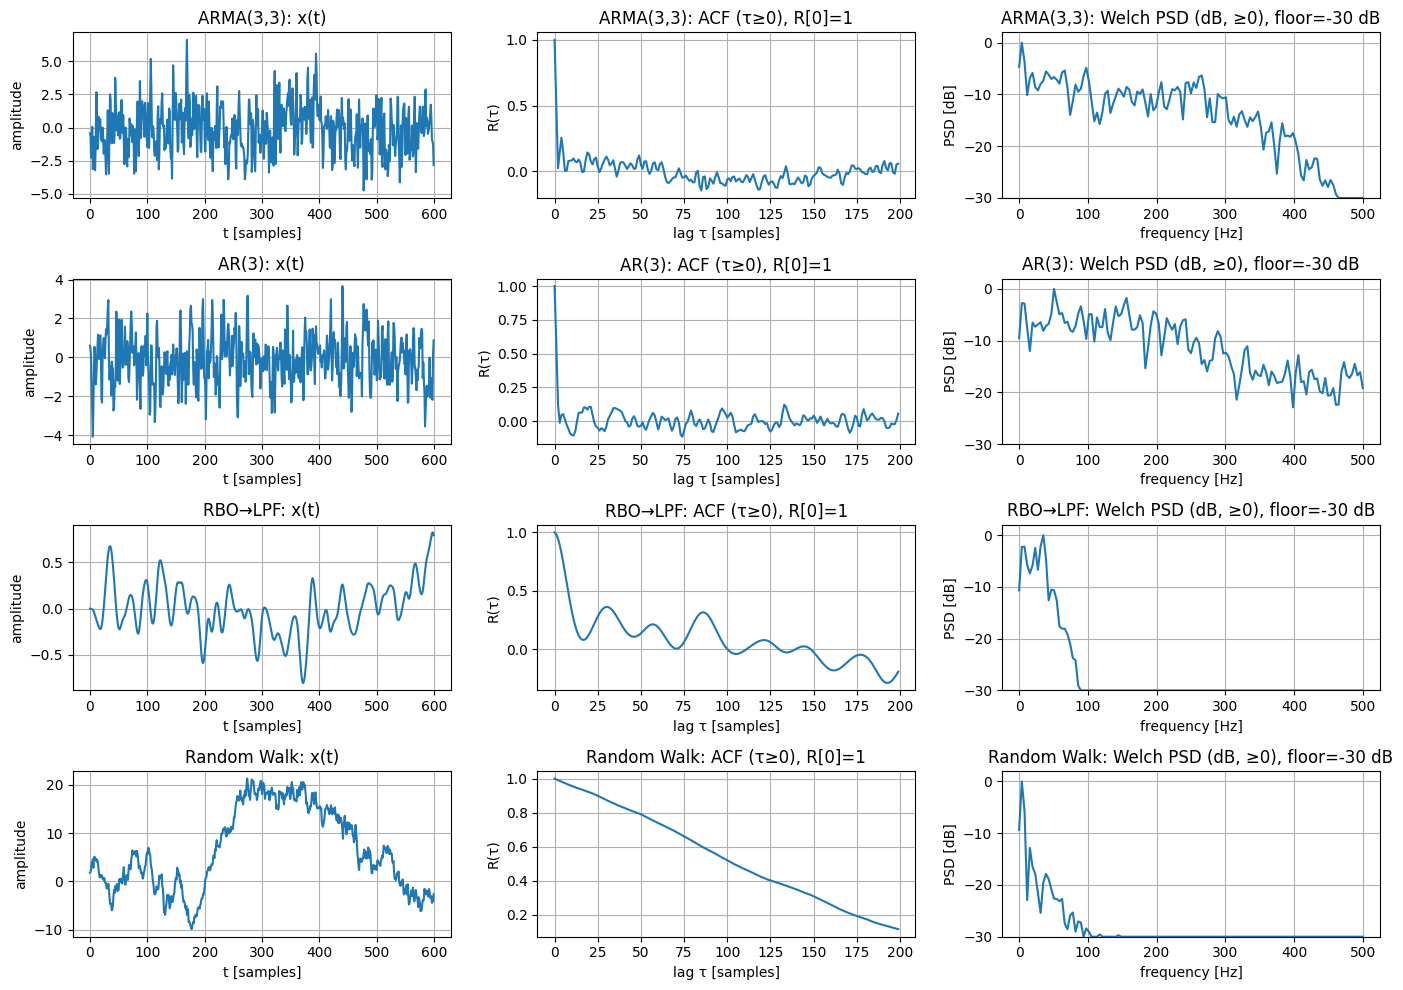

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# =====================================================
# CONFIGURACION
# =====================================================

np.random.seed(2)

N = 600
fs = 1000  # Hz
t = np.arange(N)

# =====================================================
# FUNCIONES
# =====================================================

def acf_normalizada(x, maxlags=200):

    r = np.correlate(x, x, mode='full')
    mid = len(r)//2

    r = r[mid:mid+maxlags]

    # normalizar
    r = r / r[0]

    return r


def welch_psd_db(x, fs):

    f, Pxx = signal.welch(x, fs=fs, nperseg=256)

    # normalizar
    Pxx = Pxx / np.max(Pxx)

    # convertir a dB
    Pxx_db = 10*np.log10(Pxx)

    # limitar a -30 dB
    Pxx_db[Pxx_db < -30] = -30

    return f, Pxx_db


# =====================================================
# GENERACION DE SEÑALES
# =====================================================

# ARMA(3,3)
ar = [1, -0.75, 0.5, -0.3]
ma = [1, 0.6, -0.4, 0.25]

arma33 = signal.lfilter(ma, ar, np.random.randn(N))


# AR(3)
ar3 = [1, -0.8, 0.4, -0.2]
ar_signal = signal.lfilter([1], ar3, np.random.randn(N))


# Ruido blanco + LPF
noise = np.random.randn(N)

b, a = signal.butter(4, 0.08)

lpf_signal = signal.lfilter(b, a, noise)


# Random walk
rw = np.cumsum(np.random.randn(N))


signals = [arma33, ar_signal, lpf_signal, rw]

titles = [
    "ARMA(3,3)",
    "AR(3)",
    "RBO→LPF",
    "Random Walk"
]


# =====================================================
# GRAFICA 4x3
# =====================================================

fig, axes = plt.subplots(4, 3, figsize=(14, 10))

for i in range(4):

    x = signals[i]

    # x(t)
    axes[i,0].plot(t, x)
    axes[i,0].set_title(f"{titles[i]}: x(t)")
    axes[i,0].set_xlabel("t [samples]")
    axes[i,0].set_ylabel("amplitude")
    axes[i,0].grid(True)


    # ACF
    r = acf_normalizada(x)

    axes[i,1].plot(r)
    axes[i,1].set_title(f"{titles[i]}: ACF (τ≥0), R[0]=1")
    axes[i,1].set_xlabel("lag τ [samples]")
    axes[i,1].set_ylabel("R(τ)")
    axes[i,1].grid(True)


    # PSD
    f, psd = welch_psd_db(x, fs)

    axes[i,2].plot(f, psd)
    axes[i,2].set_title(f"{titles[i]}: Welch PSD (dB, ≥0), floor=-30 dB")
    axes[i,2].set_xlabel("frequency [Hz]")
    axes[i,2].set_ylabel("PSD [dB]")
    axes[i,2].set_ylim([-30, 2])
    axes[i,2].grid(True)


plt.tight_layout()
plt.show()

# Demostración de que la función es una Autocorrelación válida

Sea la función:

$$
R_x(\lambda)
=
\sum_{k=-K}^{K}
W_k \, e^{-\alpha_k \lambda^2}
\quad , \quad W_k \ge 0
$$

Se desea demostrar si es una función de autocorrelación válida (ACF) de un proceso aleatorio WSS.

---

# 1. Propiedad de Simetría

Una función de autocorrelación debe cumplir:

$$
R_x(\lambda) = R_x(-\lambda)
$$

Evaluamos:

$$
R_x(-\lambda)
=
\sum_{k=-K}^{K}
W_k e^{-\alpha_k (-\lambda)^2}
$$

Como:

$$
(-\lambda)^2 = \lambda^2
$$

Entonces:

$$
R_x(-\lambda)
=
\sum_{k=-K}^{K}
W_k e^{-\alpha_k \lambda^2}
=
R_x(\lambda)
$$

Por lo tanto, la función es simétrica.

---

# 2. Valor máximo en λ = 0

Evaluamos en cero:

$$
R_x(0)
=
\sum_{k=-K}^{K}
W_k e^{0}
$$

$$
R_x(0)
=
\sum_{k=-K}^{K}
W_k
$$

Para cualquier λ ≠ 0:

$$
e^{-\alpha_k \lambda^2} \le 1
$$

Por lo tanto:

$$
R_x(\lambda)
\le
\sum_{k=-K}^{K}
W_k
=
R_x(0)
$$

Se cumple que el valor máximo ocurre en λ = 0.

---

# 3. Condición de positiva definida (Teorema de Wiener–Khinchin)

Una función es una autocorrelación válida si su transformada de Fourier es no negativa:

$$
S_x(\omega)
=
\mathcal{F}
\{R_x(\lambda)\}
$$

Calculamos la transformada:

$$
\mathcal{F}
\{
e^{-\alpha_k \lambda^2}
\}
=
\sqrt{\frac{\pi}{\alpha_k}}
e^{-\omega^2 / (4\alpha_k)}
$$

Entonces:

$$
S_x(\omega)
=
\sum_{k=-K}^{K}
W_k
\sqrt{\frac{\pi}{\alpha_k}}
e^{-\omega^2 / (4\alpha_k)}
$$

Como:

$$
W_k \ge 0
$$

y

$$
e^{-\omega^2 / (4\alpha_k)} > 0
$$

entonces:

$$
S_x(\omega) \ge 0
$$

Se cumple la condición necesaria y suficiente.

---

# 4. Finita en λ = 0

Ya demostramos que:

$$
R_x(0)
=
\sum_{k=-K}^{K}
W_k
$$

que es un valor finito.

---

# Conclusión

La función:

$$
R_x(\lambda)
=
\sum_{k=-K}^{K}
W_k e^{-\alpha_k \lambda^2}
$$

cumple las propiedades:

- Simetría
- Máximo en λ = 0
- Positiva definida
- Espectro de potencia no negativo
- Valor finito en λ = 0

Por lo tanto:

$$
\boxed{
R_x(\lambda)
\text{ es una función de autocorrelación válida}
}
$$

ARMA(3,3)
K óptimo: 49
ECM: 0.0057918948711402326
Norma L2: 1.0762801560133153
AR(3)
K óptimo: 49
ECM: 0.00490666230665524
Norma L2: 0.9906222596585684
RBO→LPF
K óptimo: 49
ECM: 0.012803312965412962
Norma L2: 1.6002070469419238
Random Walk
K óptimo: 49
ECM: 0.01632204532082706
Norma L2: 1.8067675733655983


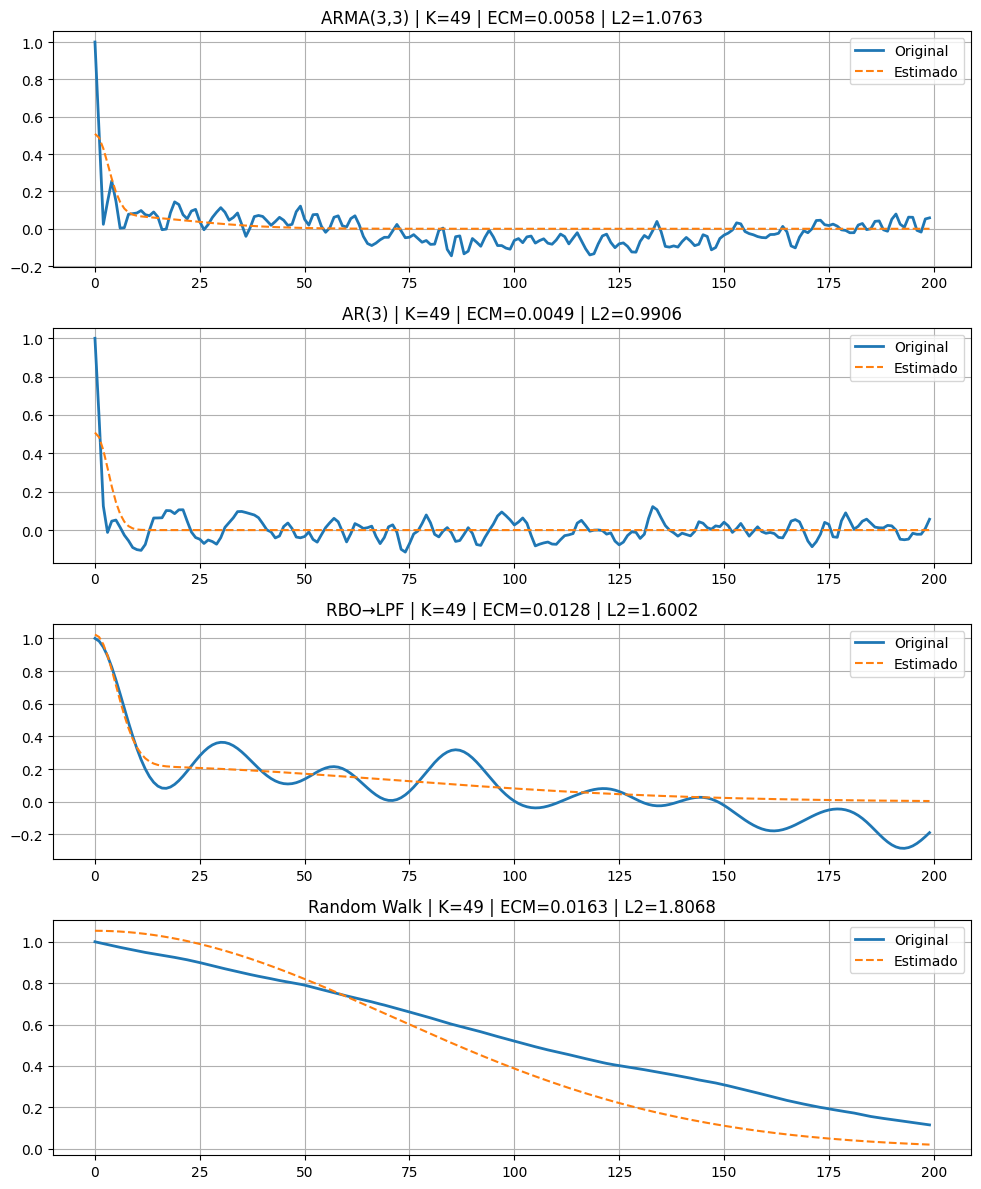

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import nnls

# =====================================
# CONFIGURACION
# =====================================

np.random.seed(2)

N = 600
maxlags = 200
t = np.arange(N)

# =====================================
# FUNCION ACF NORMALIZADA
# =====================================

def acf(x, maxlags):

    r = np.correlate(x, x, mode='full')
    mid = len(r)//2

    r = r[mid:mid+maxlags]

    return r / r[0]


# =====================================
# GENERAR SEÑALES
# =====================================

ar = [1, -0.75, 0.5, -0.3]
ma = [1, 0.6, -0.4, 0.25]

arma33 = signal.lfilter(ma, ar, np.random.randn(N))

ar3 = signal.lfilter([1], [1, -0.8, 0.4, -0.2], np.random.randn(N))

b,a = signal.butter(4, 0.08)
lpf = signal.lfilter(b, a, np.random.randn(N))

rw = np.cumsum(np.random.randn(N))


signals = [arma33, ar3, lpf, rw]

titles = ["ARMA(3,3)", "AR(3)", "RBO→LPF", "Random Walk"]

# =====================================
# FUNCION PARA CREAR BASE GAUSSIANA
# =====================================

def gaussian_basis(lags, K):

    alphas = np.linspace(0.0001, 0.05, K)

    Phi = np.zeros((len(lags), K))

    for k in range(K):
        Phi[:,k] = np.exp(-alphas[k] * lags**2)

    return Phi


# =====================================
# BUSCAR MEJOR K
# =====================================

def estimate_acf(r):

    lags = np.arange(len(r))

    for K in range(1,50):

        Phi = gaussian_basis(lags, K)

        w, _ = nnls(Phi, r)

        r_est = Phi @ w

        mse = np.mean((r - r_est)**2)

        norm2 = np.linalg.norm(r - r_est)

        if mse < 0.1 and norm2 < 0.1:

            return K, w, r_est, mse, norm2

    return K, w, r_est, mse, norm2


# =====================================
# PROCESAR Y GRAFICAR
# =====================================

fig, axes = plt.subplots(4,1, figsize=(10,12))

for i in range(4):

    r = acf(signals[i], maxlags)

    K, w, r_est, mse, norm2 = estimate_acf(r)

    print("=================================")
    print(titles[i])
    print("K óptimo:", K)
    print("ECM:", mse)
    print("Norma L2:", norm2)

    axes[i].plot(r, label="Original", linewidth=2)

    axes[i].plot(r_est, '--', label="Estimado")

    axes[i].set_title(
        f"{titles[i]} | K={K} | ECM={mse:.4f} | L2={norm2:.4f}"
    )

    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()